# Travaux Pratiques – Chaînes de Markov-HMMs - MDI341
## ALI Mohammad Fayyaz - MS BGD 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# <span style="color:blue"> Partie 1

On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par une chaîne de Markov. Les 28 états du modèle correspondent aux 26 lettres de l’alphabet auxquelles et on ajoute un état ‘espace initial’ (état 1) et un état ‘espace final’ (état 28) qui sert à terminer les mots.  
La correspondance entre la valeur numérique d’un état et un caractère est la suivante : l’état 1 correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin de mot. Les états 2 à 27 correspondent aux caractères de a à z. On pourra utiliser une structure de dictionnaire en python pour faire cette correspondance.
On utilisera une chaîne de Markov ergodique entre les 26 états correspondants aux lettres de l’alphabet.

## I.2.a Matrice de transitions

'bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.

In [2]:
bigrams_eng = np.loadtxt('Partie1/bigramenglish.txt')

In [3]:
bigrams_eng

array([[0.0000000e+00, 1.1268720e-01, 4.3608943e-02, 4.5454545e-02,
        3.2904451e-02, 2.2094495e-02, 4.1763341e-02, 1.5555790e-02,
        6.4437882e-02, 6.8920059e-02, 3.6384729e-03, 4.2185193e-03,
        2.3465514e-02, 3.9759544e-02, 2.2832736e-02, 7.0343809e-02,
        3.1058848e-02, 1.4237503e-03, 2.5680236e-02, 6.6916262e-02,
        1.6452225e-01, 1.0388104e-02, 7.0660198e-03, 7.0502004e-02,
        1.0546298e-04, 1.0599030e-02, 5.2731491e-05, 0.0000000e+00],
       [0.0000000e+00, 1.4701126e-05, 2.2933757e-02, 3.3959601e-02,
        3.8075917e-02, 1.4701126e-04, 6.1744730e-03, 2.4697892e-02,
        8.8206757e-04, 3.7046838e-02, 8.8206757e-04, 1.1907912e-02,
        8.1150216e-02, 3.5870748e-02, 2.2051689e-01, 1.4701126e-04,
        1.8082385e-02, 1.4701126e-05, 9.4822263e-02, 9.5410308e-02,
        1.3348623e-01, 1.1760901e-02, 3.3371556e-02, 9.8497545e-03,
        5.8804504e-04, 1.9846520e-02, 8.8206757e-04, 6.7478169e-02],
       [0.0000000e+00, 7.1874260e-02, 7.898270

### A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne?

- La première ligne de la matrice de transition correspond à la probabilité d'avoir la lettre, correspondante à la colonne, comme première lettre du mot.     
- La dernière colonne correspond à la probabilité que la fin du mot arrive après la lettre qui correspond à la ligne de la matrice.

### Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.

In [4]:
dic={1 : ' ', 
     2 : 'a', 
     3 : 'b', 
     4: 'c', 
     5 : 'd', 
     6 : 'e', 
     7: 'f', 
     8 : 'g', 
     9 : 'h', 
     10: 'i', 
     11: 'j', 
     12 : 'k', 
     13 : 'l', 
     14: 'm', 
     15 : 'n', 
     16 : 'o', 
     17: 'p', 
     18 : 'q', 
     19 : 'r' , 
     20: 's', 
     21 : 't', 
     22 : 'u', 
     23: 'v', 
     24 : 'w', 
     25 : 'x' , 
     26: 'y', 
     27 : 'z', 
     28 : ' ' }

In [5]:
Lettre_Plus_Frequente=[]
for line in bigrams_eng:
    Lettre_Plus_Frequente.append(dic[np.argmax(line)+1])
    
Lettre_Plus_Frequente

['t',
 'n',
 'e',
 'o',
 ' ',
 ' ',
 ' ',
 ' ',
 'e',
 'n',
 'o',
 ' ',
 'e',
 'e',
 ' ',
 'n',
 'e',
 'u',
 'e',
 ' ',
 'h',
 'r',
 'e',
 'a',
 't',
 ' ',
 'e',
 ' ']

- On peut remarquer que les mots en anglais commencent le plus souvent par un 't'.
- Plusieurs lettres ('d','e','f','g','k','n','s','y') sont les plus souvent utilisés pour terminer un mot.

## I.2.b Générer un mot

### On veut générer un mot à partir de l’état initial 1 (espace de début de mot).    
### Ecrire une fonction etat_suivant qui génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition.  

In [6]:
x = np.random.random()
print(x)

0.047788281771544705


In [7]:
def etat_suivant(bigram, etat_courant):
    #tirage aléatoire d'un nombre entre 0 et 1
    x = np.random.random()
    #print(x)
    #récupération de la ligne dans la matrice de transition
    repartition = bigram[etat_courant-1,:]
    #print(np.cumsum(repartition))
    #Sélection état suivant 
    new_vect = np.concatenate(([0], np.cumsum(repartition)))
    #print(new_vect)
    etat_s= np.where(new_vect > x)[0][0]
    return etat_s

In [8]:
etat_suivant(bigrams_eng, 10)

4

### Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.  

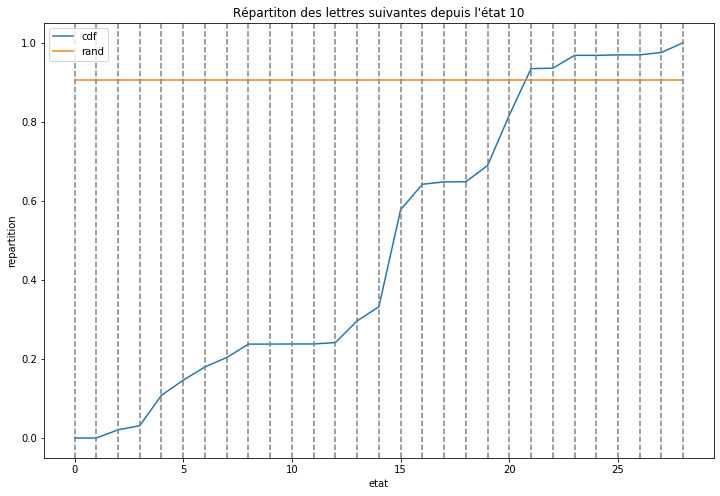

In [9]:
plt.figure(figsize=(12,8))
repartition = bigrams_eng[9,:]
new_vect = np.concatenate(([0],np.cumsum(repartition)))
plt.plot(new_vect)
plt.title("Répartiton des lettres suivantes depuis l'état 10")
plt.xlabel("etat")
plt.ylabel("repartition")

x = np.random.random()
plt.plot([0,28],[x, x])

for i in range(29):
    plt.axvline(i, c='grey',ls='--')

plt.legend(['cdf','rand'])
plt.show()

La fonction de répartition nous permet de sélectionner l'état suivant à partir d'une variable aléatoire tirée selon une loi uniforme, en choisissant l'état (la lettre) correspondant au segment dans lequel la variable tirée appartient.   
Nous avons 28 segments en rajoutant un zéro au vecteur cumsum(repartition).  
Nous voyons bien que les lettres les plus probables ont les 'morceaux' de la courbe de répartition les plus grands, la loi de répartition sera respectée de cette façon.  

### Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (28).

In [10]:
def genere_state_seq(bigram):
    state = 1
    seq = []
    while state != 28:
        seq.append(state)
        state = etat_suivant(bigram, state)
        #print(state)
    return seq

In [11]:
genere_state_seq(bigrams_eng)

[1, 8, 6, 5, 10, 13, 10, 8]

### Ecrire une fonction display_seq qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire. 

In [12]:
def display_seq(seq, dic):
    mot=[]
    for e in seq:
        #print(e)
        mot.append(dic[e])
        
    return ''.join(mot)

In [13]:
seq_test = genere_state_seq(bigrams_eng)
seq_test

[1, 7, 10, 23, 6]

In [14]:
display_seq(seq_test,dic)

' five'

### Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.

In [15]:
for i in range(10) :
    print(display_seq(genere_state_seq(bigrams_eng),dic))

 g
 tug
 urwad
 tisuane
 s
 htillior
 puerende
 pr
 nitthindl
 fr


## I.2.c Générer une phrase

### On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence.  

In [16]:
def modify_mat_dic(dic,bigram):
    #Ajout '.' dans le dic
    dic[29] = '.'
    #Ajout d'une ligne et d'une colonne dans bigram:
    bigram = np.vstack((bigram, np.zeros(28)))
    bigram = np.hstack((bigram, np.zeros(29).reshape(-1,1))) 

    #Transition de '.' à '.' = 1
    bigram[28,28] = 1
    
    # Transitions de l'état 28:
    bigram[27,27] = 0
    bigram[27,28] = 0.1
    bigram[27,0] = 0.9
    
    return bigram

In [17]:
bigrams_eng_2 = modify_mat_dic(dic,bigrams_eng)

In [18]:
print(np.shape(bigrams_eng))
print(np.shape(bigrams_eng_2))

(28, 28)
(29, 29)


In [19]:
print(bigrams_eng_2[28,28])
print(bigrams_eng_2[27,28])
print(bigrams_eng_2[27,0])
print(bigrams_eng_2[27,27])

1.0
0.1
0.9
0.0


In [20]:
def genere_state_seq_phrase(bigram):
    state = 1
    seq = []
    while state != 29:
        state = etat_suivant(bigram, state)
        #print(state)
        seq.append(state)
    return seq

In [21]:
display_seq(genere_state_seq_phrase(bigrams_eng_2),dic)

'at  iof  seronghnony  cin  cimeif  uavir  othepols  ton  n  s  p  ti  avista  o .'

### Donner des exemples de phrases générées.

In [22]:
for i in range(10) :
    print(display_seq(genere_state_seq_phrase(bigrams_eng_2),dic))

cto  ig  p  burcoul  t  sow  sped  topeathe  frthamereshedowerionlitme  inen  ncondim  jupe  s  ghora  ererdeigranthe  iowhen  hinesentily  alicliewoneraredus  bot  awhiaro  angno  oalof  th  d  win  f  t  ampof  t  ice .
wry  sroned  f  a  aracas  ouss  as  cr  rd  hed  f  andant  ouemee .
wherst  anisn  phicise  vendibogre  lvetirr  spe  whe  l  her  rlaiteacegugheg  osf  vout  l  whe  thoralint  tha  hay  cepon  inond  amenupus  bis  tepavenf .
jovabof  s  m  t  dingat  we  p  th  ithastun  d  f  mof  wangrsly  tirofr  he  reroonthe .
ad  p  l  d  tthnd  s  the  m  sin .
anthupand  an  o  comes  catous  amefa  d  f  s  phe  wilisofarto  nges  dend  an  ullamatrt  hilike .
be  oe  ong  wh  tuldaue  of  byspiond  ticl  amelince  heve  ceseasfind  a .
anngring  s  rch  hatan  tad  t  e  r  ly  curknds  tanefof  g .
wncr  itofaldire  arinveave .
ta  di  the  hiceauprorafean  or  riseins  therinoranty  iathimootongincoucllaiglate  arin  a  t  n  my  tot  f  s .


## I.3. Reconnaissance de la langue

### Charger la matrice des transitions entre caractères pour le français. 

In [23]:
bigrams_fra = np.loadtxt('Partie1/bigramfrancais.txt')

In [24]:
bigrams_fra_2 = modify_mat_dic(dic,bigrams_fra)
bigrams_fra_2

array([[0.0000000e+00, 7.6216533e-02, 1.1725620e-02, 7.0353723e-02,
        2.0617549e-01, 6.7422318e-02, 2.1496971e-02, 1.0748485e-02,
        9.7713504e-04, 1.9542701e-02, 2.9314051e-03, 9.7713504e-05,
        1.7490717e-01, 1.6611296e-02, 6.5468048e-02, 1.8565566e-02,
        7.7193668e-02, 2.0519836e-02, 2.2474106e-02, 6.0582372e-02,
        1.3679891e-02, 3.4199726e-02, 6.8399453e-03, 9.7713504e-05,
        9.7713504e-05, 9.7713504e-05, 9.7713504e-04, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 3.4141345e-04, 3.4141345e-03, 2.3898942e-02,
        3.4141345e-03, 3.4141345e-04, 1.0242404e-02, 1.3656538e-02,
        3.4141345e-04, 5.8040287e-02, 3.4141345e-03, 3.4141345e-04,
        4.0969614e-02, 5.8040287e-02, 1.7753499e-01, 3.4141345e-04,
        3.0727211e-02, 6.8282690e-03, 5.4626152e-02, 8.1939228e-02,
        1.1949471e-01, 1.3315125e-01, 2.0484807e-02, 3.4141345e-04,
        3.4141345e-04, 3.4141345e-04, 3.4141345e-04, 1.5705019e-01,
        0.0000000e+00],


### Ecrire une fonction calc_vraisemblance qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , + et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement.

In [25]:
dic2 = copy.deepcopy(dic)

In [26]:
dic2[1] = '-'
dic2[28] = '+'
dic2

{1: '-',
 2: 'a',
 3: 'b',
 4: 'c',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'h',
 10: 'i',
 11: 'j',
 12: 'k',
 13: 'l',
 14: 'm',
 15: 'n',
 16: 'o',
 17: 'p',
 18: 'q',
 19: 'r',
 20: 's',
 21: 't',
 22: 'u',
 23: 'v',
 24: 'w',
 25: 'x',
 26: 'y',
 27: 'z',
 28: '+',
 29: '.'}

In [27]:
def transforme_phrase(phrase):
    mots = phrase.split()
    taille_liste = len(mots)
    new_list = []
    i = 1
    for m in mots:
        
        if i == 1:
            #new_list.append('-')
            new_list.append(m)
            new_list.append('+-')
        elif i != taille_liste:
            new_list.append(m)
            new_list.append('+-')
        else:
            fm = m.split('.')
            new_list.append(fm[0])
            new_list.append('+.')
            
        i = i + 1
    return ''.join(new_list)

In [28]:
transforme_phrase('etre ou ne pas etre.')

'etre+-ou+-ne+-pas+-etre+.'

In [29]:
def calc_vraisemblance(dic, bigram, phrase):
    indice_mot_precedent = 0
    vrais = 1
    
    for lettre in phrase:
        
        indice_mot_courant = [key for key, val in dic.items() if val == lettre][0] - 1
        #print(indice_mot_courant)
        vrais = vrais * bigram[indice_mot_precedent, indice_mot_courant]
        indice_mot_precedent = [key for key, val in dic.items() if val == lettre][0] - 1
        #print(vrais)
        
        
    return vrais

### Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ». De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne pas etre ».

In [30]:
calc_vraisemblance(dic2, bigrams_fra_2, transforme_phrase('etre ou ne pas etre.'))

1.145706887234789e-19

In [31]:
calc_vraisemblance(dic2, bigrams_eng_2, transforme_phrase('etre ou ne pas etre.'))

4.462288711775253e-24

'etre ou ne pas etre.' a une plus grande vraisemblance d'être une phrase en français.

In [32]:
calc_vraisemblance(dic2, bigrams_fra_2, transforme_phrase('to be or not to be.'))

5.9602081018686406e-30

In [33]:
calc_vraisemblance(dic2, bigrams_eng_2, transforme_phrase('to be or not to be.'))

8.112892227809415e-20

'to be or not to be.' a une plus grande vraisemblance d'être une phrase en anglais.

# <span style="color:blue"> Partie 2

L’objectif de cette partie est de générer des séquences d’observations suivant un modèle de Markov Caché donné, puis de calculer la vraisemblance d’une séquence d’observations suivant un modèle de Markov Caché donné.  
  
Le modèle de Markov est de type discret. Les classes de caractères (classes 0, 1, 7) sont modélisées chacune par un modèle à Q=5 états de type gauche-droite. Les états 1 et 5 correspondent à des colonnes de pixels de type fond de l’image (niveau 0). Les états 2, 3 et 4 correspondent au début, milieu et fin du caractère respectivement. Les transitions entre états sont indiquées dans la matrice de transitions A de taille QxQ. Les vecteurs π sont tous égaux à π=(1 0 0 0 0). Les séquences d’états commencent donc toujours par l’état q1=1.  
  
Les séquences d’observations sont discrètes et issues d’images de chiffres de la base MNIST. Les séquences d’observations consistent en séquences d’index (symboles) des éléments du dictionnaire. Ce dictionnaire est stocké sous forme matricielle (matrice v) dans le fichier matrice_symboles. L’élément numéro i d’une séquence d’observations correspond au symbole i et donc à la colonne i de la matrice v. Un symbole correspond à une configuration de colonne de 5 pixels (binaires : noir/blanc). Il y a 2^5=32 configurations, et donc symboles possibles.
Une séquence d’observations correspondant à l’image simplifiée de la fig. 1 est :
[1 1 1 1 1 1 14 23 23 27 18 18 18 12 12 12 12 12 12 12 23 23 23 14 4 1 1 1]
La concaténation des éléments du dictionnaire correspondant aux index de la séquence d’observations peut être visualisée sous forme d’image en remplaçant chaque index par le vecteur de pixels correspondant dans le dictionnaire (Fig. 2).

## II. 2. Génération de séquences d’observations

Les matrices A0.txt, B0.txt, vect_p0.txt contiennent les matrices A, B, et le vecteur π correspondant au modèle de Markov caché du chiffre 0. Le fichier matrice_symboles.txt contient le dictionnaire. Charger ces fichiers depuis le site pédagogique.

In [34]:
# Modèle de chiffre 0
A0 = np.loadtxt('Partie2/A0.txt') #Transition entre états
B0 = np.loadtxt('Partie2/B0.txt') #Probabilité des observations dans chaque état caché
Pi0 = np.loadtxt('Partie2/vect_pi0.txt') #Probabilité état initial
v = np.loadtxt('Partie2/matrice_symboles.txt') #Dictionnaire des motifs

### II. 2.1 A quoi correspondent les zéros de la matrice B ? et ceux de la matrice A et du vecteur π?

In [35]:
print('shape(B0):',np.shape(B0))
print('shape(A0):',np.shape(A0))
print('shape(Pi0):',np.shape(Pi0))

shape(B0): (32, 5)
shape(A0): (5, 5)
shape(Pi0): (5,)


- les 0 de la matrice B0 sont les motifs impossibles dans l'état correspondant à la colonne  
- les 0 de la matrice A0 sont les transitions impossibles entre l'état liée à la ligne et l'état lié à la colonne
- les 0 de la matrice P0 sont les états initiaux impossibles (uniquement l'état 1 est possible)

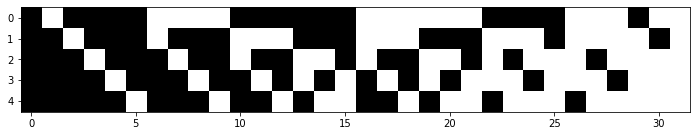

In [36]:
plt.figure(figsize=(12,8))
plt.imshow(v, 'gray')
plt.show()

### II.2.2 Ecrire une fonction etat_suivant qui génère un état qt+1(à t+1) à partir de l’état courant qt (à t) à l’aide de la matrice de transitions et de la fonction de répartition cumsum.

In [37]:
def etat_suivant_p2(bigram, etat_courant):
    #tirage aléatoire d'un nombre entre 0 et 1
    x = np.random.random()
    #print(x)
    #récupération de la ligne dans la matrice de transition
    repartition = bigram[etat_courant-1,:]
    #print(np.cumsum(repartition))
    #Sélection état suivant 
    new_vect = np.concatenate(([0], np.cumsum(repartition)))
    #print(new_vect)
    etat_s= np.where(new_vect > x)[0][0]
    return etat_s

### Afficher la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.

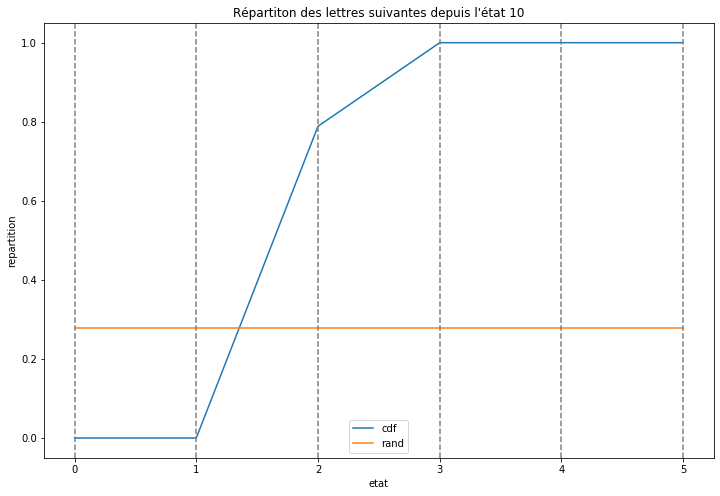

In [38]:
plt.figure(figsize=(12,8))
repartition = A0[1,:]
new_vect = np.concatenate(([0],np.cumsum(repartition)))
plt.plot(new_vect)
plt.title("Répartiton des lettres suivantes depuis l'état 10")
plt.xlabel("etat")
plt.ylabel("repartition")

x = np.random.random()
plt.plot([0,5],[x, x])

for i in range(6):
    plt.axvline(i, c='grey',ls='--')

plt.legend(['cdf','rand'])
plt.show()

La fonction de répartition nous permet de sélectionner l'état suivant à partir d'une variable aléatoire tirée selon une loi uniforme, en choisissant l'état (le motif) correspondant au segment dans lequel la variable tirée appartient.   
Nous avons 5 segments à rajoutant un zéro au vecteur cumsum(repartition).  
Nous voyons bien que les lettres les plus probables ont les 'morceaux' de la courbe de répartition les plus grands, la loi de répartition sera respectée de cette façon.  

### II.2.3 Générer une séquence d’observations suivant le modèle de Markov Caché du chiffre 0. On commencera par générer une séquence d’états suivant ce modèle à l’aide de la fonction etat_suivant. Puis on générera la séquence d’observations par le même procédé.

In [39]:
def genere_state_seq_p2(A):
    state = 1 # Seul état initial possible: 1
    seq = []
    while len(seq) < 28:
        seq.append(state)
        state = etat_suivant(A, state)

        #print(state)
    return seq

In [40]:
genere_state_seq_p2(A0)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [41]:
def genere_obs_seq_p2(seq_states,B):
    
    etat_s = []
    for s in seq_states:
        x = np.random.random()
        #print(x)
        repartition = B[:,s-1]
        new_vect = np.concatenate(([0], np.cumsum(repartition)))
        new_vect[-1] = 1
        #print(new_vect[-1])
        etat_s.append(np.where(new_vect > x)[0][0])
    
    return etat_s

In [42]:
genere_obs_seq_p2(genere_state_seq_p2(A0),B0)

[1,
 1,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 14,
 23,
 9,
 3,
 23,
 23,
 4,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

### II.2.4 Visualiser le résultat sous forme d’image.

In [43]:
zero = genere_obs_seq_p2(genere_state_seq_p2(A0),B0)

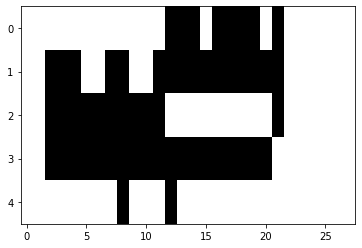

In [44]:
im=[]
# les x contiennent les index dans le dictionnaire 
for t in range (0,len(zero)):
    im_col=v[:, zero[t]-1] 
    im.append(im_col)

im = np.array(im).T # now make an array
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')

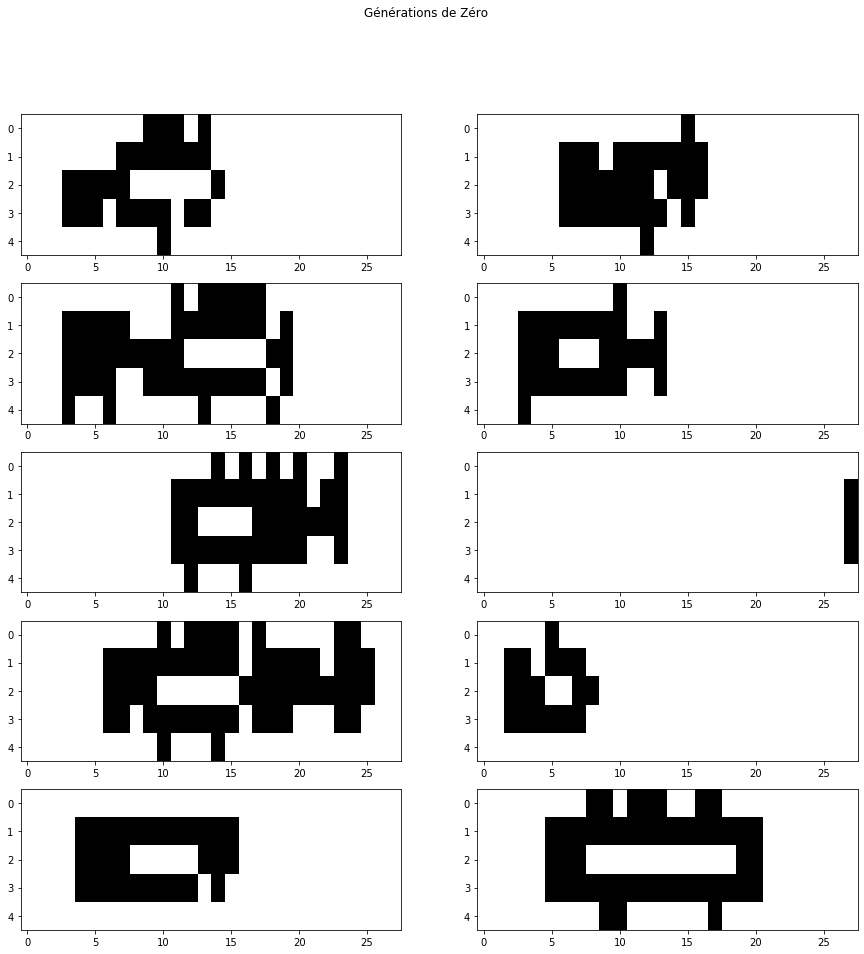

In [45]:
fig, ax = plt.subplots(2,5,figsize=(15,15))
fig.suptitle("Générations de Zéro")
number_of_subplots = 10

for ind in range(number_of_subplots):
    ind = ind+1
    ax1 = plt.subplot(5,2,ind)
    
    zero = genere_obs_seq_p2(genere_state_seq_p2(A0),B0)
   
    im=[]
    for t in range (0,len(zero)):
        im_col=v[:, zero[t]-1] 
        im.append(im_col)

    im = np.array(im).T # now make an array
    ax1.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
    

plt.show()

### Générer des séquences pour le chiffre 7 et le chiffre 1 (matrices B1.txt, B7.txt, etc...)

In [46]:
# Modèle de chiffre 7
A7 = np.loadtxt('Partie2/A7.txt') #Transition entre états
B7 = np.loadtxt('Partie2/B7.txt') #Probabilité des observations dans chaque état caché
Pi7 = np.loadtxt('Partie2/vect_pi7.txt') #Probabilité état initial

In [47]:
sept = genere_obs_seq_p2(genere_state_seq_p2(A7),B7)

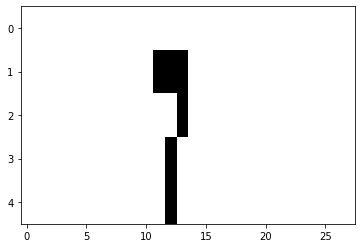

In [48]:
im=[]
# les x contiennent les index dans le dictionnaire 
for t in range (0,len(sept)):
    im_col=v[:, sept[t]-1] 
    im.append(im_col)

im = np.array(im).T # now make an array
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')

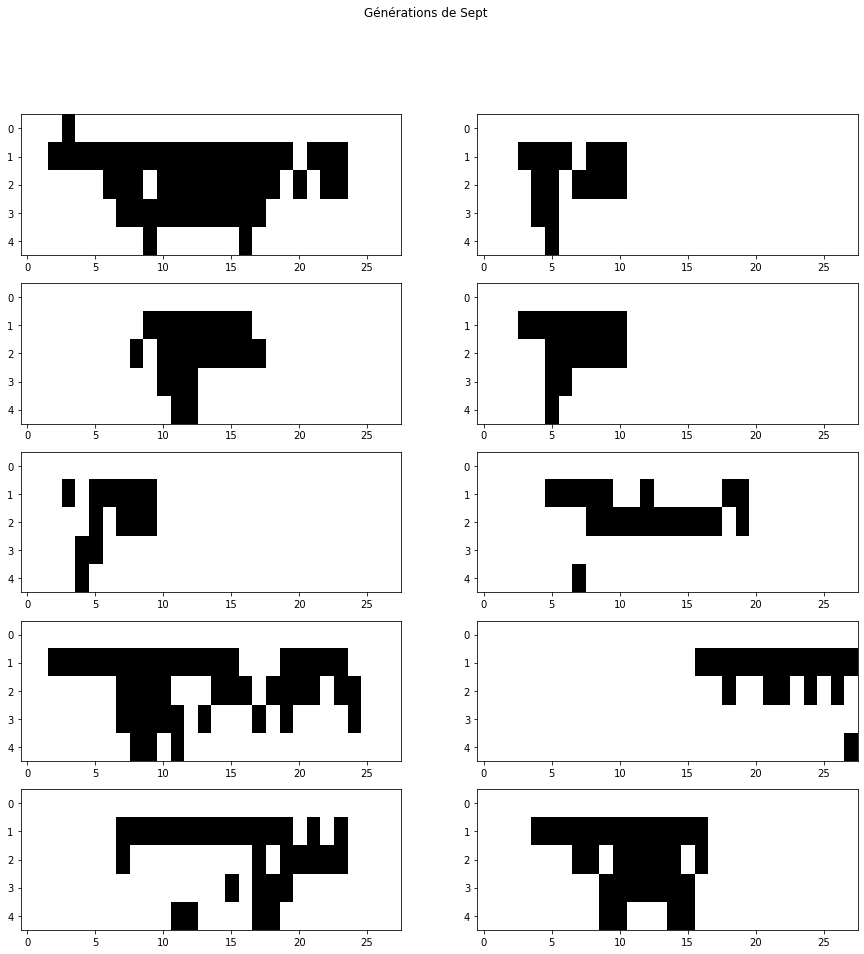

In [49]:
fig, ax = plt.subplots(2,5,figsize=(15,15))
fig.suptitle("Générations de Sept")
number_of_subplots = 10

for ind in range(number_of_subplots):
    ind = ind+1
    ax1 = plt.subplot(5,2,ind)
    
    sept = genere_obs_seq_p2(genere_state_seq_p2(A7),B7)
   
    im=[]
    for t in range (0,len(sept)):
        im_col=v[:, sept[t]-1] 
        im.append(im_col)

    im = np.array(im).T # now make an array
    ax1.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
    

plt.show()

In [50]:
# Modèle de chiffre 1
A1 = np.loadtxt('Partie2/A1.txt') #Transition entre états
B1 = np.loadtxt('Partie2/B1.txt') #Probabilité des observations dans chaque état caché
Pi1 = np.loadtxt('Partie2/vect_pi1.txt') #Probabilité état initial

In [51]:
un = genere_obs_seq_p2(genere_state_seq_p2(A1),B1)

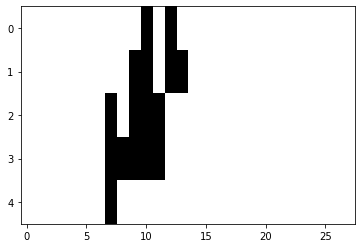

In [52]:
im=[]
# les x contiennent les index dans le dictionnaire 
for t in range (0,len(un)):
    im_col=v[:, un[t]-1] 
    im.append(im_col)

im = np.array(im).T # now make an array
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')

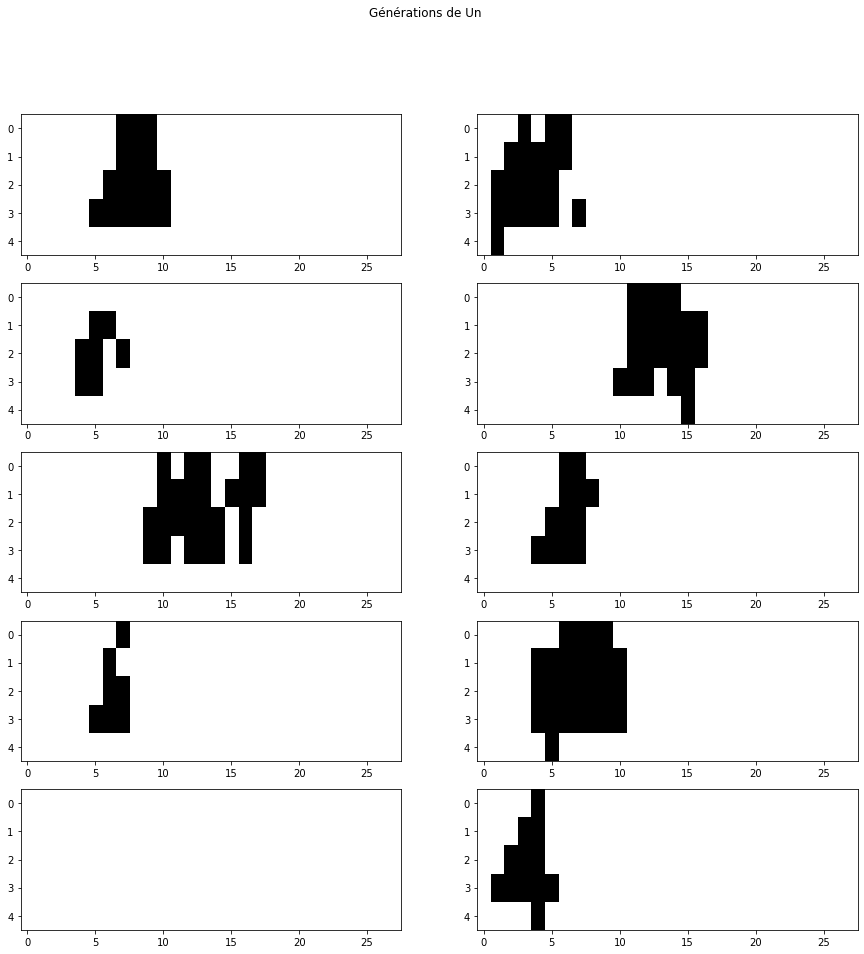

In [53]:
fig, ax = plt.subplots(2,5,figsize=(15,15))
fig.suptitle("Générations de Un")
number_of_subplots = 10

for ind in range(number_of_subplots):
    ind = ind+1
    ax1 = plt.subplot(5,2,ind)
    
    un = genere_obs_seq_p2(genere_state_seq_p2(A1),B1)
   
    im=[]
    for t in range (0,len(un)):
        im_col=v[:, un[t]-1] 
        im.append(im_col)

    im = np.array(im).T # now make an array
    ax1.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
    

plt.show()

## II.3. Calcul de la vraisemblance de séquences d’observations

Les fichiers SeqTest0.txt, SeqTest1.txt, SeqTest7.txt contiennent chacun 10 séquences d’observations de chiffres des 3 classes 0, 1 et 7, disposés en ligne. Le script suivant extrait la 5ème observation de la 3ème séquence des chiffres 0.

In [54]:
Test0=np.loadtxt('Partie2/SeqTest0.txt')
Test1=np.loadtxt('Partie2/SeqTest1.txt')
Test7=np.loadtxt('Partie2/SeqTest7.txt')
np.shape(Test0)

(10, 28)

In [55]:
nex=2
seq= Test0[nex, : ] 
seq[4]

1.0

### II.3.1 Calculer la vraisemblance de ces séquences suivant chacun des modèles (0, 1 et 7) par l’algorithme de Viterbi (on pourra implémenter la version logarithmique de cet algorithme). Pour cela les matrices A, B et π seront converties en logarithmes (utiliser np.log).

In [56]:
# Viterbi:
## nous allons chercher le parcours optimal d'état qui a permis de générer les observations ayant généré le chiffre.
## Viterbi fait l'approximation de la vraisemblance de l'état t par le max des probabilités par états 
## pour la vraisemblance de la séquence d'observations à l'instant t.
## nous parcourons colonne par colonne l'image, ce qui nous permet de sélectionner le chemin le plus vraisemblable.

rep_zero = 0.0001 # Remplacement des probabilités nulles pour pouvoir passer au log

 
def viterbi(V, a, b, initial_distribution):
    
    V = V-1
    a = np.maximum(a,rep_zero)
    b = np.maximum(b,rep_zero)
    initial_distribution = np.maximum(initial_distribution,rep_zero)
    
    T = V.shape[0] 
    #print(T)
    M = a.shape[0]
    #print(M)
 
    omega = np.zeros((T, M))
    omega[0, :] = np.log(initial_distribution * b[:, V[0]])
 
    prev = np.zeros((T - 1, M))
    
    for t in range(1, T):
        for j in range(M):
            # Same as Forward Probability
            probability = omega[t - 1] + np.log(a[:, j]) + np.log(b[j, V[t]])
 
            # This is our most probable state given previous state at time t (1)
            prev[t - 1, j] = np.argmax(probability)
 
            # This is the probability of the most probable state (2)
            omega[t, j] = np.max(probability)
            
 
    # Path Array
    S = np.zeros(T)
 
    # Find the most probable last hidden state
    last_state = np.argmax(omega[T - 1, :])
 
    S[0] = last_state
    log_vrais = omega[-1, last_state]
    backtrack_index = 1
    
    for i in range(T - 2, -1, -1):
        
        S[backtrack_index] = prev[i, int(last_state)]
        #log_vrais = log_vrais + omega[i,int(last_state)]

        last_state = prev[i, int(last_state)]
        backtrack_index += 1
 
    # Flip the path array since we were backtracking
    S = np.flip(S, axis=0)
    
 
    return log_vrais #, S+1, omega, prev 

In [57]:
viterbi(Test0[0,:].astype(int),A0,B0.T,Pi0)

-29.208426705363717

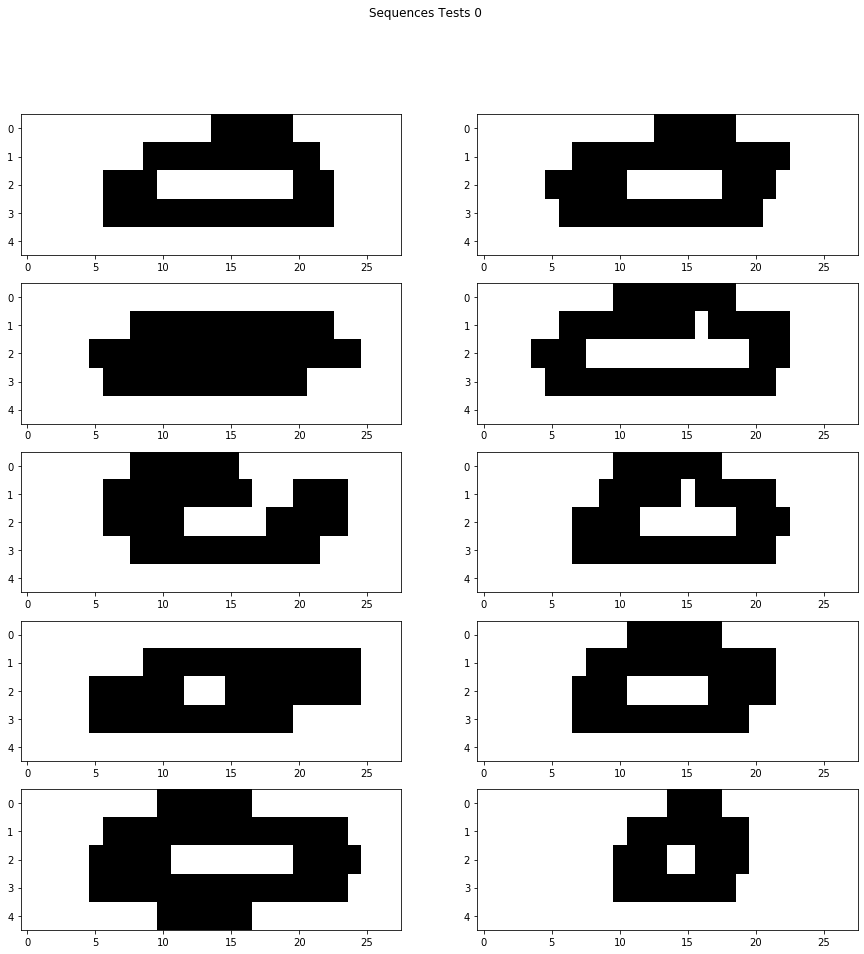

In [58]:
fig, ax = plt.subplots(2,5,figsize=(15,15))
fig.suptitle("Sequences Tests 0")
number_of_subplots = 10

for ind in range(number_of_subplots):
    #ind = ind+1
    ax1 = plt.subplot(5,2,ind+1)
    
   
    im=[]
    for t in range(28):
        im_col=v[:,int(Test0[ind,t]-1)] 
        im.append(im_col)

    im = np.array(im).T # now make an array
    ax1.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
    

plt.show()

In [59]:
LogVraisemblance_0 = []
for ind in range(10):
    LogVraisemblance_0.append(viterbi(Test0[ind,:].astype(int),A0,B0.T,Pi0))
    
LogVraisemblance_0

[-29.208426705363717,
 -32.68234996207178,
 -38.309577006740305,
 -32.16647268405238,
 -48.547107434668916,
 -32.18850137867669,
 -35.277741843072974,
 -25.575501241501946,
 -42.38375762605021,
 -21.836038362572413]

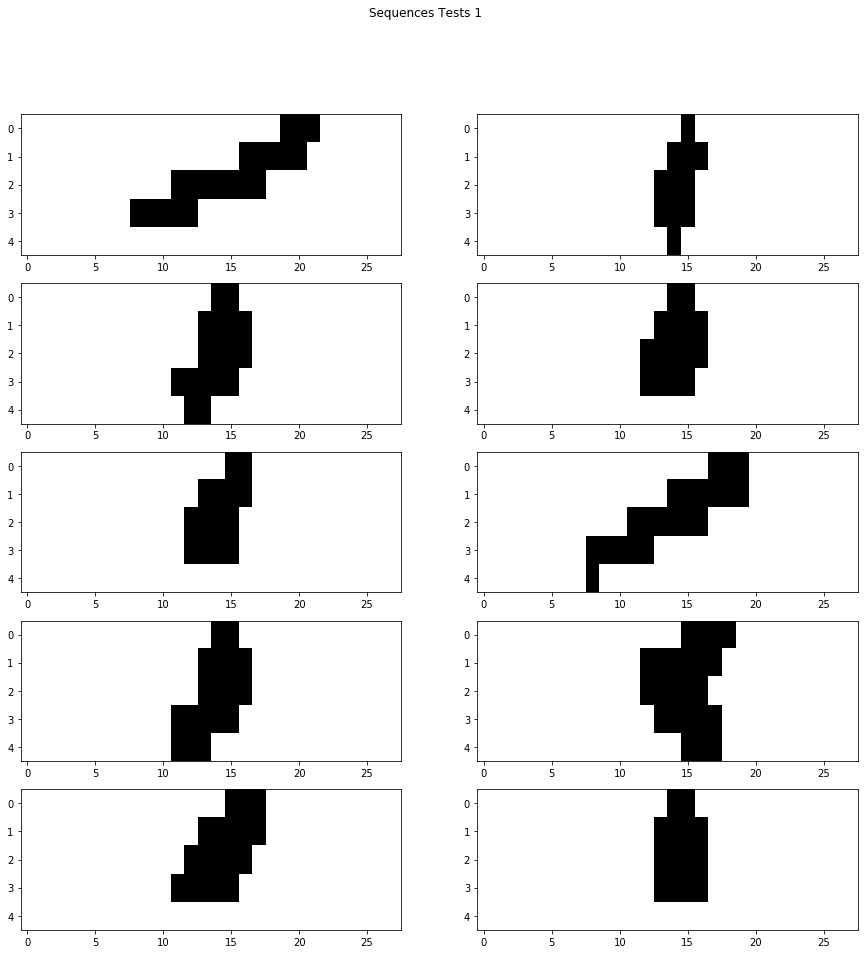

In [60]:
fig, ax = plt.subplots(2,5,figsize=(15,15))
fig.suptitle("Sequences Tests 1")
number_of_subplots = 10

for ind in range(number_of_subplots):
    #ind = ind+1
    ax1 = plt.subplot(5,2,ind+1)
    
   
    im=[]
    for t in range(28):
        im_col=v[:,int(Test1[ind,t]-1)] 
        im.append(im_col)

    im = np.array(im).T # now make an array
    ax1.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
    

plt.show()

In [61]:
LogVraisemblance_1 = []
for ind in range(10):
    LogVraisemblance_1.append(viterbi(Test1[ind,:].astype(int),A1,B1.T,Pi1))
    
LogVraisemblance_1

[-53.326274000006876,
 -13.187904670419448,
 -23.337237751096225,
 -13.598990029774578,
 -13.71865871704602,
 -44.173100175418455,
 -29.449165697120588,
 -32.03266474623107,
 -18.908507677380406,
 -10.832459939334324]

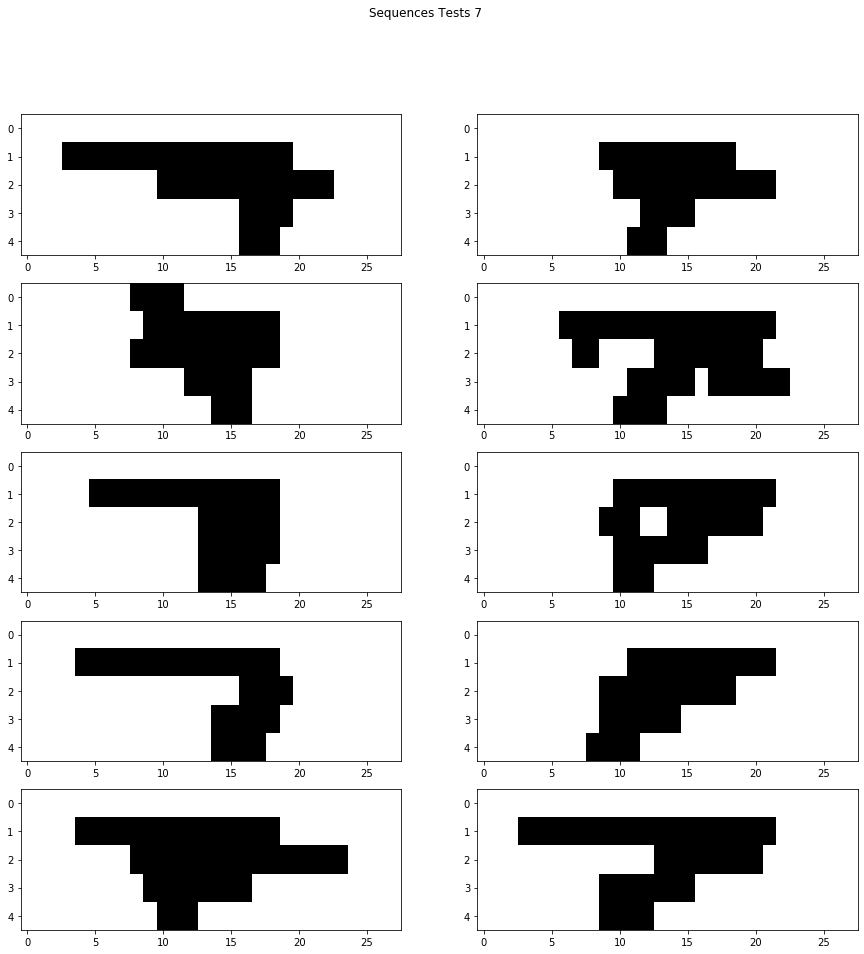

In [62]:
fig, ax = plt.subplots(2,5,figsize=(15,15))
fig.suptitle("Sequences Tests 7")
number_of_subplots = 10

for ind in range(number_of_subplots):
    #ind = ind+1
    ax1 = plt.subplot(5,2,ind+1)
    
   
    im=[]
    for t in range(28):
        im_col=v[:,int(Test7[ind,t]-1)] 
        im.append(im_col)

    im = np.array(im).T # now make an array
    ax1.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
    

plt.show()

In [63]:
LogVraisemblance_7 = []
for ind in range(10):
    LogVraisemblance_7.append(viterbi(Test1[ind,:].astype(int),A7,B7.T,Pi7))
    
LogVraisemblance_7

[-68.591412607657,
 -28.439522524027605,
 -39.18668877476419,
 -34.63863858557215,
 -34.90571884139439,
 -62.92502886545917,
 -35.263203925231046,
 -45.051225224628915,
 -51.33900991274763,
 -38.07375834910825]

### II.3.2 Donner le résultat de la classification des images de test en considérant un problème à trois classes : 0, 1 et 7.

In [64]:
def classif_images(Test,A0,B0,Pi0,A1,B1,Pi1,A7,B7,Pi7):
    nb_images = np.shape(Test0)[0]
    Liste_Classif = []
    
    for ind in range(nb_images):
        LV_0 = viterbi(Test[ind,:].astype(int),A0,B0.T,Pi0)
        LV_1 = viterbi(Test[ind,:].astype(int),A1,B1.T,Pi1)
        LV_7 = viterbi(Test[ind,:].astype(int),A7,B7.T,Pi7)
        
        Liste_LV = [LV_0, LV_1, LV_7]
        Liste_LV = np.array(Liste_LV)
        
        Classif = np.argmax(Liste_LV)
        
        if Classif == 0:
            Classif_Chiffre = '0'
        elif Classif == 1:
            Classif_Chiffre = '1'
        else:
            Classif_Chiffre = '7'

        
        Liste_Classif.append(Classif_Chiffre)
        
    return Liste_Classif

In [65]:
classif_images(Test0,A0,B0,Pi0,A1,B1,Pi1,A7,B7,Pi7)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

In [66]:
classif_images(Test1,A0,B0,Pi0,A1,B1,Pi1,A7,B7,Pi7)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [67]:
classif_images(Test7,A0,B0,Pi0,A1,B1,Pi1,A7,B7,Pi7)

['7', '7', '1', '7', '7', '7', '7', '7', '7', '7']

La classification fonctionne plutôt bien, seule la troisième image de 7 est confondue avec un 1. Visuellement il est aussi compliqué de faire la distinction:

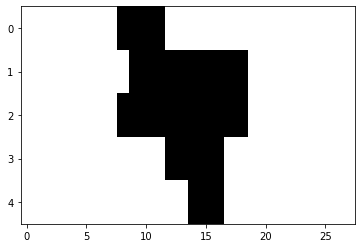

In [68]:
im=[]
for t in range(28):
    im_col=v[:,int(Test7[2,t]-1)] 
    im.append(im_col)

im = np.array(im).T # now make an array
plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')